In [ ]:
pip install biomart
pip install gseapy

In [1]:
import gseapy as gp
import scanpy as sc
import numpy as np

In [2]:
import pandas as pd

In [ ]:
# Pfad zur vorhandenen DEG-Liste (ersetzen Sie mit Ihrem Pfad)
deg_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'

In [47]:
import gseapy as gp

# Pfade zu den Dateien
deg_file = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
gene_sets = '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_GLYCOLYSIS.v2023.1.Hs.gmt'  # Pfad zu deiner Gene-Set-Datei

# Lade DEG-Liste (angenommen, die Datei hat eine Spalte "Gene")
deg_list = []
with open(deg_file, 'r') as f:
    for line in f:
        gene = line.strip()
        deg_list.append(gene)

# Führe GSEA durch
result = gp.enrichr(gene_list=deg_list, gene_sets=gene_sets)

# Zeige das GSEA-Ergebnis
print(result.res2d)


ValueError: No objects to concatenate

In [22]:
with open(gene_sets, 'r') as gmt_file:
    gmt_content = gmt_file.read()

print(gmt_content)

HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION	https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION	ABI3BP	ACTA2	ADAM12	ANPEP	APLP1	AREG	BASP1	BDNF	BGN	BMP1	CADM1	CALD1	CALU	CAP2	CAPG	CCN1	CCN2	CD44	CD59	CDH11	CDH2	CDH6	COL11A1	COL12A1	COL16A1	COL1A1	COL1A2	COL3A1	COL4A1	COL4A2	COL5A1	COL5A2	COL5A3	COL6A2	COL6A3	COL7A1	COL8A2	COLGALT1	COMP	COPA	CRLF1	CTHRC1	CXCL1	CXCL12	CXCL6	CXCL8	DAB2	DCN	DKK1	DPYSL3	DST	ECM1	ECM2	EDIL3	EFEMP2	ELN	EMP3	ENO2	FAP	FAS	FBLN1	FBLN2	FBLN5	FBN1	FBN2	FERMT2	FGF2	FLNA	FMOD	FN1	FOXC2	FSTL1	FSTL3	FUCA1	FZD8	GADD45A	GADD45B	GAS1	GEM	GJA1	GLIPR1	GPC1	GPX7	GREM1	HTRA1	ID2	IGFBP2	IGFBP3	IGFBP4	IL15	IL32	IL6	INHBA	ITGA2	ITGA5	ITGAV	ITGB1	ITGB3	ITGB5	JUN	LAMA1	LAMA2	LAMA3	LAMC1	LAMC2	LGALS1	LOX	LOXL1	LOXL2	LRP1	LRRC15	LUM	MAGEE1	MATN2	MATN3	MCM7	MEST	MFAP5	MGP	MMP1	MMP14	MMP2	MMP3	MSX1	MXRA5	MYL9	MYLK	NID2	NNMT	NOTCH2	NT5E	NTM	OXTR	P3H1	PCOLCE	PCOLCE2	PDGFRB	PDLIM4	PFN2	PLAUR	PLOD1	PLOD2	PLOD3	PMEPA1	PMP22	POSTN	PPIB	PRRX1	PRSS

In [19]:
import gseapy as gp
import pandas as pd

# Path to the gene sets file
gene_sets = '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_HYPOXIA.v2023.1.Hs.gmt'  # Replace with the actual path

# Load your DEG list
deg_list_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
                
deg_df = pd.read_csv(deg_list_path)

# Extract gene identifiers from the DEG list
gene_identifiers = deg_df.iloc[:, 2].tolist()

# Ausgabe der gefilterten DEG-Daten mit Gen-Namen
#print(gene_identifiers)


# Perform GSEA using extracted gene identifiers
result = gp.enrichr(gene_list=gene_identifiers, gene_sets=gene_sets)

# Display the GSEA result
print(result.res2d)


                          Gene_set              Term Overlap  P-value  \
0  HALLMARK_HYPOXIA.v2023.1.Hs.gmt  HALLMARK_HYPOXIA  65/200      1.0   

   Adjusted P-value  Odds Ratio  Combined Score  \
0               1.0    0.326683            -0.0   

                                               Genes  
0  PIM1;NDRG1;EFNA1;PLAUR;TGM2;KLF7;RORA;EXT1;CCN...  


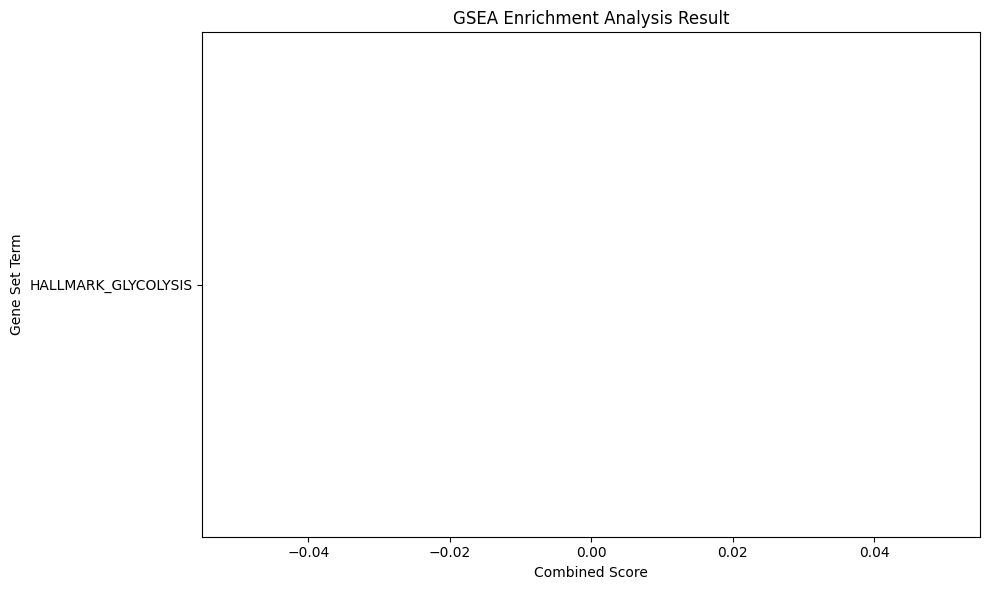

In [20]:
import gseapy as gp
import pandas as pd
import matplotlib.pyplot as plt

# Paths to the gene sets files
gene_sets_files = [
    '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_GLYCOLYSIS.v2023.1.Hs.gmt',
    'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt',  # Add more gene set files
    # Add more gene set file paths as needed
]

# Load your DEG list
deg_list_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
deg_df = pd.read_csv(deg_list_path)

# Extract gene identifiers from the DEG list
gene_identifiers = deg_df.iloc[:, 2].tolist()

# List to store GSEA results
all_results = []

# Perform GSEA for each gene set file
for gene_sets in gene_sets_files:
    result = gp.enrichr(gene_list=gene_identifiers, gene_sets=gene_sets)
    all_results.append(result)

# Create bar plots for each gene set
for idx, result in enumerate(all_results):
    plt.figure(figsize=(10, 6))
    plt.barh(result.res2d["Term"], result.res2d["Combined Score"], color="blue")
    plt.xlabel("Combined Score")
    plt.ylabel("Gene Set Term")
    plt.title(f"GSEA Enrichment Analysis Result - Gene Set {idx + 1}")
    plt.tight_layout()
    plt.show()


2023-08-30 10:39:07,237 [WARNING] User defined gene sets is not found: HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt, skip.


Exception: No GeneSets are valid !!! Check your gene_sets input.

/tmp/ipykernel_438052/3054114487.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


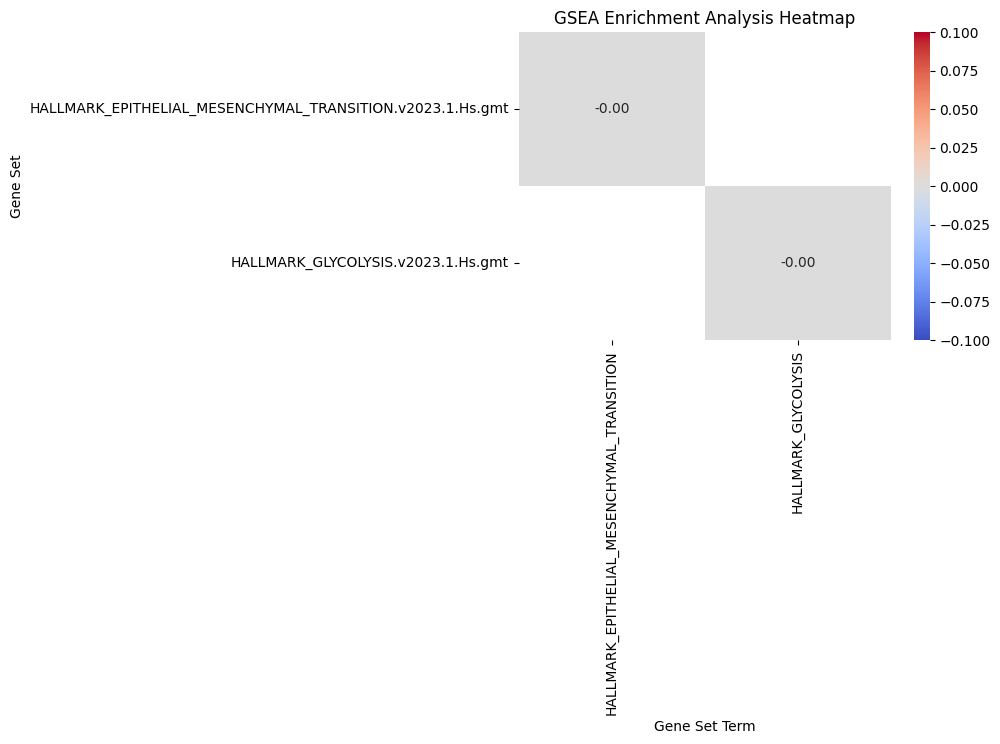

In [21]:
import gseapy as gp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paths to the gene sets files
gene_sets_files = [
    '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_GLYCOLYSIS.v2023.1.Hs.gmt',
    '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt',  # Add more gene set files
    # Add more gene set file paths as needed
]

# Load your DEG list
deg_list_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
deg_df = pd.read_csv(deg_list_path)

# Extract gene identifiers from the DEG list
gene_identifiers = deg_df.iloc[:, 2].tolist()

# Create a list to store GSEA results
all_results = []

# Perform GSEA for each gene set file
for gene_sets in gene_sets_files:
    result = gp.enrichr(gene_list=gene_identifiers, gene_sets=gene_sets)
    all_results.append(result.res2d)

# Concatenate the results into a single DataFrame
final_results = pd.concat(all_results)

# Pivot the DataFrame for heatmap visualization
heatmap_data = final_results.pivot(index="Gene_set", columns="Term", values="Combined Score")

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("GSEA Enrichment Analysis Heatmap")
plt.xlabel("Gene Set Term")
plt.ylabel("Gene Set")
plt.tight_layout()
plt.show()


In [ ]:
pip install gseapy pandas seaborn matplotlib

In [32]:
import gseapy as gp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the gene sets file
gene_sets_files = '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt'  # Replace with the actual path
    # Add more gene set files as needed

# Read gene identifiers from the gene sets file
with open(gene_sets_file, 'r') as f:
    gene_set_identifiers = set(f.read().split())

print(gene_sets_file)
    
# Load your DEG list
deg_list_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
deg_df = pd.read_csv(deg_list_path)

# Extract gene identifiers from the DEG list
gene_identifiers = deg_df.iloc[:, 2].tolist()
print(gene_set)

# Create a list to store GSEA results
all_results = []
 
# Perform GSEA for each gene set file
for gene_sets in gene_sets_files:
    result = gp.enrichr(gene_list=gene_identifiers, gene_sets=gene_sets)
    all_results.append(result.res2d)

# Concatenate the results into a single DataFrame
final_results = pd.concat(all_results)

# Pivot the DataFrame for heatmap visualization
heatmap_data = final_results.pivot(index="Gene_set", columns="Term", values="Combined Score")

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("GSEA Enrichment Analysis Heatmap")
plt.xlabel("Gene Set Term")
plt.ylabel("Gene Set")
plt.tight_layout()
plt.show()


/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt


NameError: name 'gene_set' is not defined

In [36]:
import gseapy as gp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gene_set_path = '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt'  # Replace with the actual path
with open(gene_set_path, 'r') as gene_set_file:
    gene_set_genes = set(gene_set_file.read().strip().split('\t')[2:])
print(gene_set_genes)
    

{'CXCL8', 'LAMA3', 'CD59', 'APLP1', 'COL6A2', 'PVR', 'SCG2', 'SERPINE2', 'PFN2', 'FUCA1', 'CXCL6', 'CCN2', 'CD44', 'DCN', 'LRRC15', 'SGCB', 'SGCD', 'MEST', 'PTX3', 'SLC6A8', 'VEGFA', 'FBN2', 'MCM7', 'TIMP3', 'FGF2', 'INHBA', 'MMP2', 'MSX1', 'COL12A1', 'LOXL2', 'ITGAV', 'PDGFRB', 'CCN1', 'FOXC2', 'PRRX1', 'PDLIM4', 'CAPG', 'RGS4', 'COL16A1', 'TGFB1', 'COL5A2', 'JUN', 'TNFRSF11B', 'LRP1', 'CALD1', 'EDIL3', 'BDNF', 'NT5E', 'MATN3', 'FAP', 'WIPF1', 'IGFBP4', 'TPM4', 'ITGB5', 'MYL9', 'SNAI2', 'SLIT2', 'VIM', 'COL1A1', 'PCOLCE', 'PMP22', 'LOX', 'LAMC1', 'QSOX1', 'LAMA2', 'PLAUR', 'PLOD3', 'SNTB1', 'AREG', 'P3H1', 'FLNA', 'DPYSL3', 'NTM', 'BASP1', 'FBLN1', 'COL5A3', 'ENO2', 'LOXL1', 'MATN2', 'POSTN', 'VCAN', 'CRLF1', 'RHOB', 'FSTL1', 'NNMT', 'BGN', 'IL32', 'ITGA5', 'COL3A1', 'TNC', 'THBS2', 'ECM2', 'COL7A1', 'ANPEP', 'TPM2', 'BMP1', 'DST', 'DKK1', 'CDH6', 'SDC4', 'COL11A1', 'GAS1', 'THY1', 'LAMC2', 'VCAM1', 'CDH2', 'IL6', 'CDH11', 'SLIT3', 'PLOD1', 'GREM1', 'ITGB3', 'MAGEE1', 'PLOD2', 'COL5A1

In [37]:

deg_list_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
deg_df = pd.read_csv(deg_list_path)
print(deg_df)

                    0         1 gene_name
0     ENSG00000164032  2.475180     H2AZ1
1     ENSG00000197451  2.333972   HNRNPAB
2     ENSG00000101361  1.988561     NOP56
3     ENSG00000203760  2.511373     CENPW
4     ENSG00000119969  2.848776     HELLS
...               ...       ...       ...
1078  ENSG00000170345 -5.866974       FOS
1079  ENSG00000122884 -2.568223     P4HA1
1080  ENSG00000176171 -2.340556     BNIP3
1081  ENSG00000120738 -4.969254      EGR1
1082  ENSG00000234741 -2.770039      GAS5

[1083 rows x 3 columns]


In [38]:
# Extract gene identifiers from the DEG list
deg_gene_identifiers = set(deg_df['gene_name'])
print(deg_gene_identifiers)

{'PIM1', 'NRG2', 'ELL2', 'SERPINE2', 'UPK1A', 'RRM1', 'CCN2', 'CYGB', 'OLFM2', 'NR2F2-AS1', 'TRIB1', 'CTPS1', 'ADAMTS9', 'ZNF185', 'CAMKMT', 'LINC01239', 'G0S2', 'HEY1', 'MRC2', 'DMGDH', 'RUNX2', 'MLPH', 'TGFA', 'RAP1GAP2', 'HES1', 'NOCT', 'ATF3', 'CACNG8', 'FLJ16779', 'MCTP1', 'RHBDL2', 'CDK6', 'MYO10', 'GUCY1A2', 'PBK', 'LTBP1', 'CSGALNACT1', 'EFNA5', 'CKS2', 'PDGFB', 'GRIK2', 'SFN', 'UBALD2', 'LINC01629', 'SLC20A1', 'GALNT10', 'LINC02739', 'MGST1', 'CLTCL1', 'NKX6-2', 'KDM6B', 'KCNQ1OT1', 'COL1A1', 'KIF2C', 'LOX', 'SGO1-AS1', 'RIMS2', 'RORA', 'ADIRF', 'TRHDE', 'KLHL4', 'KLHL29', 'APCDD1L-DT', 'GAL', 'APBB2', 'FOXS1', 'ANKS1B', 'COL27A1', 'COL6A1', 'NAV3', 'KLF12', 'CAMTA2', 'STOX2', 'KCTD11', 'TLE4', 'HMGA2', 'TMEM255B', 'CHAC1', 'AMIGO2', 'DMKN', 'PODXL', 'DNAAF3-AS1', 'STK33', 'CP', 'HERC4', 'LAMA4', 'TANC2', 'THRB', 'DISC1FP1', 'LIMA1', 'IQGAP2', 'DUSP1', 'CDA', 'SNCA', 'TOP2A', 'FGF13', 'SH3RF2', 'PRSS3', 'KIF11', 'AUTS2', 'KSR1', 'CASC15', 'MAP2', 'CCNA2', 'LINC00842', 'PLEKHG4

In [ ]:
# Perform GSEA for the gene set file
result = gp.enrichr()

In [35]:


# Identify common gene identifiers in both DEG list and gene set
common_identifiers = gene_set_genes & deg_gene_identifiers

# Perform GSEA for the gene set file
result = gp.enrichr(common_identifiers)


# Perform GSEA for the gene set file
#result = gp.enrichr(gene_list=gene_identifiers, gene_sets=[gene_sets_file])

# Get GSEA results
final_results = result.res2d

# Pivot the DataFrame for heatmap visualization
heatmap_data = final_results.pivot(index="common_identifiers", columns="Term", values="Combined Score")

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("GSEA Enrichment Analysis Heatmap")
plt.xlabel("Gene Set Term")
plt.ylabel("Gene Set")
plt.tight_layout()
plt.show()


TypeError: enrichr() missing 1 required positional argument: 'gene_sets'

In [44]:
import gseapy as gp
import pandas as pd
import io

# Path to the gene sets file
gene_sets_file = '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt'

# Read gene identifiers from the gene sets file
with open(gene_sets_file, 'r') as f:
    gene_set_genes = set(f.read().strip().split('\t')[2:])

# Load your DEG list
deg_list_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
deg_df = pd.read_csv(deg_list_path)

# Extract gene identifiers and log2 fold change values from the DEG list
gene_identifiers = deg_df['gene_name']
log2_fold_changes = deg_df['log2FoldChange']  # Assuming log2 fold change is in the 'log2FoldChange' column

# Prepare the ranked gene list
ranked_gene_list = pd.DataFrame({'gene': gene_identifiers, 'log2_fold_change': log2_fold_changes})
ranked_gene_list = ranked_gene_list.sort_values(by='log2_fold_change', ascending=False)

# Format the ranked gene list as required by GSEAPY
ranked_gene_list_str = ranked_gene_list.to_csv(index=False, sep='\t')

# Perform GSEA using the prerank method
result = gp.prerank(rnk=io.StringIO(ranked_gene_list_str), gene_sets=gene_sets_file)

# Print the GSEA results
print(result.res2d)



KeyError: 'log2FoldChange'

In [46]:
import gseapy as gp
import pandas as pd
import io
import tempfile
import os

# Path to the gene sets file
gene_sets_file = '/storage/users/sac43cg/res_Samantha_1/outs/GMT.files/HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION.v2023.1.Hs.gmt'

# Read gene identifiers from the gene sets file
with open(gene_sets_file, 'r') as f:
    gene_set_genes = set(f.read().strip().split('\t')[2:])

# Load your DEG list
deg_list_path = '/storage/users/sac43cg/res_Samantha_1/outs/DEGs/CTRL_1_vs_CTRL_2D/filtered_DEGs_with_names.csv'
deg_df = pd.read_csv(deg_list_path)

# Extract gene identifiers and log2 fold change values from the DEG list
gene_identifiers = deg_df['gene_name']
log2_fold_changes = deg_df.iloc[:, 1]  # Assuming log2 fold change is in the second column (index 1)

# Prepare the ranked gene list
ranked_gene_list = pd.DataFrame({'gene': gene_identifiers, 'log2_fold_change': log2_fold_changes})
ranked_gene_list = ranked_gene_list.sort_values(by='log2_fold_change', ascending=False)

# Create a temporary file to store the ranked gene list
temp_file = tempfile.NamedTemporaryFile(delete=False, mode='w')
ranked_gene_list.to_csv(temp_file, sep='\t', index=False)
temp_file.close()

# Perform GSEA using the prerank method
result = gp.prerank(rnk=temp_file.name, gene_sets=gene_sets_file)

# Print the GSEA results
print(result.res2d)

# Clean up the temporary file
os.remove(temp_file.name)



TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''